# Моделирование по механике: "А. Разгон/торможение"

### Петренко Людмила, М3104


## Формулировка задачи:
Минимальные входные данные: дистанция, координаты светофоров, максимальная скорость. 
Необходимо визуализировать материальную точку в движении по заданной дистанции. Характер движения материальной точки: разгон от светофора, равномерное движение при достижении максимальной скорости, торможение до остановки при приближении к следующему светофору. Построить графики зависимости x(t), v(t), a(t).

### Ввод данных:

In [ ]:
print("Введите дистанцию:")
try:
    dist = int(input())
except ValueError:
    dist = 10
print("Введите координаты светофоров - значения перемещения относительно старта через пробелы:")
points = list(map(int, input().split()))
print("Введите максимальную допустимую скорость:")
try:
    v_max = int(input())
except ValueError:
    v_max = 10

## Модель:

Между каждыми координатами светофоров на участке произвольно выбираются возможные случаи движения:
1. Материальная точка ускоряется и затем сразу замедляется.
В таком случае на участке произвольно выбираются значение координаты, в которой скорость будет максимальна и само значение скорости из диапазона допустимых значений. Затем для этих значений рассчитывается необходимое ускорение.
2. Материальная точка ускоряется, достигает максимальную скорость, движется равномерно, затем замедляется.
Аналогично предыдущему случаю, но выбираются уже две координаты, тогда как скорость известна и равна максимальной.

Таким образом, каждый участок, на котором характер движения меняется рассматривается отдельно и независимо от остальных. Для каждого такого независимого участка хранится набор параметров - начальная и конечная скорость, ускорение, начальная и конечная координаты и начальное время относительно начала движения от самого первого светофора.

Функции ниже выражают общие уравнения движения, в которые подставляются эти наборы параметров.

In [4]:
def function_x_t(v0, v_end, a, x0,t):
        return x0 + v0*t + a*(t*t)/2
    
def function_v_t(v0, v_end, a, x0,t):
        return v0 + a*t
    
def function_a_t(v0, v_end,  a, x0,t):
    return a
    
def function_a(v0, v_end, x0, x_end):
    return (v_end*v_end - v0*v0)/(2*(x_end - x0))
    
def function_x_for_x(t0, v0, v_end, a, x0, x_end):
    if (a ==  0):
        return t0 + (x_end - x0)/v0
    return t0 + (v_end - v0)/a

In [5]:
import random
output_parameters = []
x_points = []
t_for_x_points = []
t_for_x_points.append(0)
a_for_max = []
for i in range(len(points) - 1):
    type_of_situation = random.randint(1,2)
    if type_of_situation == 1: #добавляем одну новую точку и два набора параметров-констант
        x_points.append(points[i])
        x = random.randint(points[i] + 1, points[i + 1] - 1)
        x_points.append(x)
        v_end = random.randint(1, v_max)
        a_plus = function_a(0, v_end, points[i], x)
        t = function_x_for_x(t_for_x_points[len(t_for_x_points) - 1], 0, v_end, a_plus, points[i], x)
        t_for_x_points.append(t)
        output_parameters.append((0, v_end, a_plus, points[i]))
        
        a_minus = function_a(v_end, 0, x, points[i + 1])
        output_parameters.append((v_end, 0, a_minus, x))
        t = function_x_for_x(t_for_x_points[len(t_for_x_points) - 1], v_end, 0, a_minus, x,  points[i + 1])
        t_for_x_points.append(t)
        
        a_for_max.append(a_plus)
        a_for_max.append(a_minus)
    else:                        #добавляем две новые точки и три набора параметров
        x_points.append(points[i])
        x = random.randint(points[i] + 1, points[i + 1] - 1)
        x_2 = random.randint(x, points[i + 1] - 1)
        x_points.append(x)
        x_points.append(x_2)
        a_plus = function_a(0, v_max, points[i], x)
        t = function_x_for_x(t_for_x_points[len(t_for_x_points) - 1], 0, v_max, a_plus, points[i], x)
        t_for_x_points.append(t)
        output_parameters.append((0, v_max, a_plus, points[i]))
        
        output_parameters.append((v_max, v_max, 0, x))
        t = function_x_for_x(t_for_x_points[len(t_for_x_points) - 1], v_max, v_max, 0, x, x_2)
        t_for_x_points.append(t)
        
        a_minus = function_a(v_max, 0, x_2, points[i + 1])
        output_parameters.append((v_max, 0, a_minus, x_2))
        t = function_x_for_x(t_for_x_points[len(t_for_x_points) - 1], v_max, 0, a_minus, x_2, points[i + 1])
        t_for_x_points.append(t)
        
        a_for_max.append(a_plus)
        a_for_max.append(a_minus)
        

Во время анимирования движения значения времени бинпоиском сопоставляются с соответствующим участком дистанции, и для него вызываются функции с уравнениями с нужными параметрами.

In [6]:
from bisect import bisect_left
def function_x(t):
    index = bisect_left(t_for_x_points, t) - 1
    return function_x_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])

def function_v(t):
    index = bisect_left(t_for_x_points, t) - 1
    return function_v_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])

def function_a(t):
    index = bisect_left(t_for_x_points, t) - 1
    return function_a_t(output_parameters[index][0], output_parameters[index][1], output_parameters[index][2], output_parameters[index][3], t - t_for_x_points[index])


Создание статических объектов, которые не изменятся во время итераций.
1. Светофоры - зеленые треугольники
2. Конец и начало дистанции - желтые квадраты
3. Шаблоны для графиков x(t), v(t), a(t)

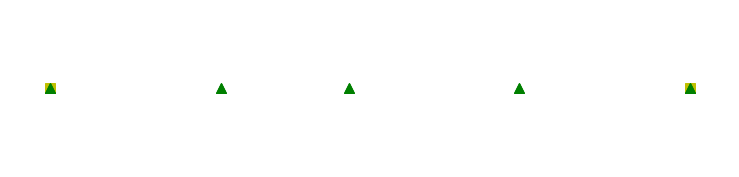

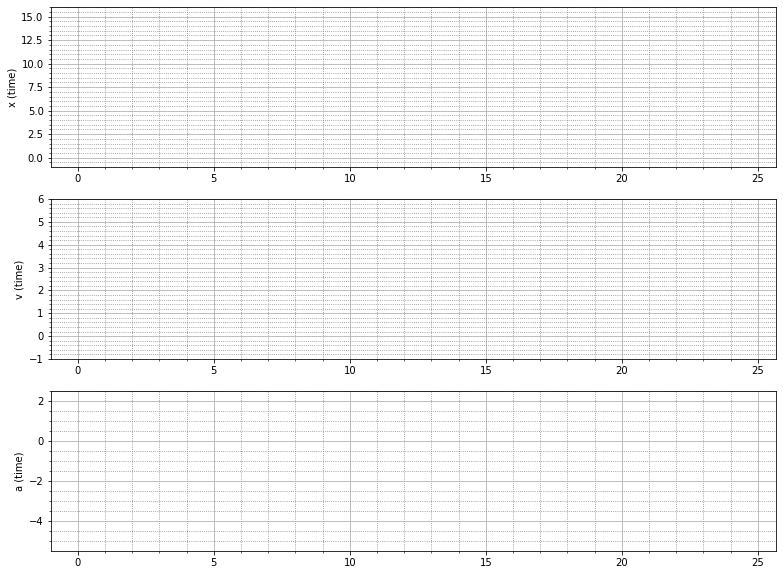

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig_model = plt.figure(figsize=(13,3))
ax_model = plt.subplot(1,1,1) 
plt.axis('off')
fig = plt.figure(figsize=(13,10))
axs = fig.subplots(3,1)

ax_model.set_xlim((-1,dist + 1))
ax_model.set_ylim((-1,1))
ax_model.set_ylabel(' ')

axs[0].set_xlim(( -1, t_for_x_points[len(t_for_x_points) - 1] + 1))        
axs[0].set_ylim(( -1, dist + 1))
axs[0].set_ylabel('x (time)')
axs[0].minorticks_on()
axs[0].grid(True, which='both')
axs[0].grid(which='minor', color='gray', linestyle=':')

axs[1].set_xlim((-1,t_for_x_points[len(t_for_x_points) - 1] + 1))
axs[1].set_ylim((-1, v_max + 1))
axs[1].set_ylabel('v (time)')
axs[1].minorticks_on()
axs[1].grid(True, which='both')
axs[1].grid(which='minor', color='gray', linestyle=':')

axs[2].set_xlim((-1,t_for_x_points[len(t_for_x_points) - 1] + 1))
axs[2].set_ylim((min(a_for_max) - 1,max(a_for_max) + 1))
axs[2].set_ylabel('a (time)')
axs[2].minorticks_on()
axs[2].grid(True, which='both')
axs[2].grid(which='minor', color='gray', linestyle=':')

linex, = axs[0].plot([], [], 'b', lw=3)    
linev, = axs[1].plot([], [], 'r', lw=3)
linea, = axs[2].plot([], [], 'c', lw=3)
pt1, = ax_model.plot([], [], 'r.', ms=20)
line3, = ax_model.plot([], [], lw=3)

start, = ax_model.plot(points[0], 0, 'ys', ms=10)
end, = ax_model.plot(points[len(points) - 1], 0, 'ys', ms=10)

for i in points:
    start, = ax_model.plot(i, 0, 'g^', ms=10)
    end, = ax_model.plot(i, 0, 'g^', ms=10)

In [8]:

def init():
    line3.set_data([], [])
    return line3,

xdata = []

def animate(i):
    t = 0.01 * i
    x = function_x(t)
    xdata.append(x)
    line3.set_data(xdata[0:1], 0)
    pt1.set_data(x, 0)
    return pt1,
 

In [ ]:
from matplotlib.animation import FuncAnimation

anim = FuncAnimation(fig_model, animate, init_func=init,
                               frames=int(100*(t_for_x_points[len(t_for_x_points) - 1])), interval=20, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())


In [ ]:
def init():
    linex.set_data([], [])
    linev.set_data([], [])
    linea.set_data([], [])
    return linex, linev, linea
xdata = []
vdata = []
adata = []
tdata = []
def animate(i):
    t = 0.01 * i
    tdata.append(t)
    x = function_x(t)
    xdata.append(x)
    v = function_v(t)
    vdata.append(v)
    a = function_a(t)
    adata.append(a)
    linex.set_data(tdata, xdata)
    linev.set_data(tdata, vdata)
    linea.set_data(tdata, adata)
    return linex, linev, linea

In [ ]:
anim = FuncAnimation(fig, animate, init_func=init, frames=int(100*(t_for_x_points[len(t_for_x_points) - 1])), interval=20, blit=True)

HTML(anim.to_html5_video())
 